## Tutorial - Dynamical Methods for Target Control of Biological Networks

In [1]:
#matplotlib
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#import basic modules
import time
import matplotlib.pyplot as plt

In [3]:
#copy CANA datasets into this directory if the package fails to install (package requires Microsoft Visual C++)
#import cana
from cana.boolean_network import *

In [4]:
#import scripts
from utils import *
from modules import *
from mean_field_computations import *
from brute_force_computations import *
from simulations import *
from gtn_construction import *

#### Create a Generalized Threshold Network (GTN)

In [5]:
#IF A BOOLEAN EXPRESSION FILE ALREADY EXISTS
mypath="data_examples\\"
n=BooleanNetwork.from_file(mypath+"drosophila_single_cell.txt",file_type='logical') #create a BooleanNetwork object
len(n.nodes)

17

In [6]:
#LUT-type GTN
ltn1=create_threshold_network_LUTs(n)
#DNF-type GTN
dtn1=create_threshold_network_dnf(n,mypath+"drosophila_single_cell.txt")
#SR-type GTN
dcm = n.dynamics_canalization_map(output=None, )
stn1 = create_threshold_network(dcm)
len(ltn1),len(dtn1),len(stn1)

(114, 89, 56)

In [7]:
#to visualize DNF expressions from a logical file
with open("drosophila_single_cell.txt") as f:
    lines=f.readlines()
nodes=[line.split('*=')[0] for line in lines if line[0]!='#']
for line in lines:
    if line[0]!='#':
        print(line.strip())
        expr,nexpr=convert_dnf(line.strip(),nodes)
        print('\n'.join(['Positive: '+expr,'Negative: '+nexpr,'']))
file_to_dnf("drosophila_single_cell.txt") #alternatively use this function for a less verbose presentation

SLP*=SLP
Positive: SLP
Negative: ~SLP

nWG*=nWG
Positive: nWG
Negative: ~nWG

nhhnHH*=nhhnHH
Positive: nhhnHH
Negative: ~nhhnHH

wg*=(CIA and SLP and not CIR) or (wg and (CIA or SLP) and not CIR)
Positive: (wg & SLP & ~CIR) | (wg & CIA & ~CIR) | (SLP & CIA & ~CIR)
Negative: CIR | (CIR & ~wg) | (CIR & ~SLP) | (CIR & ~CIA) | (~wg & ~SLP) | (~wg & ~CIA) | (~SLP & ~CIA) | (CIR & ~SLP & ~CIA)

WG*=wg
Positive: wg
Negative: ~wg

en*=nWG and not SLP
Positive: nWG & ~SLP
Negative: SLP | ~nWG

EN*=en
Positive: en
Negative: ~en

hh*=EN and not CIR
Positive: EN & ~CIR
Negative: CIR | ~EN

HH*=hh
Positive: hh
Negative: ~hh

ptc*=CIA and not EN and not CIR
Positive: CIA & ~EN & ~CIR
Negative: EN | CIR | ~CIA

PTC*=ptc or (PTC and not nhhnHH)
Positive: ptc | (PTC & ~nhhnHH)
Negative: (nhhnHH & ~ptc) | (~ptc & ~PTC)

PH*=PTC and nhhnHH
Positive: nhhnHH & PTC
Negative: ~nhhnHH | ~PTC

SMO*=not PTC or nhhnHH
Positive: nhhnHH | ~PTC
Negative: PTC & ~nhhnHH

ci*=not EN
Positive: ~EN
Negative: EN

CI*=ci


{'CI': ('ci', '~ci'),
 'CIA': ('(nhhnHH & CI) | (CI & ~PTC)', '~CI | (PTC & ~nhhnHH)'),
 'CIR': ('PTC & CI & ~nhhnHH', 'nhhnHH | ~PTC | ~CI'),
 'EN': ('en', '~en'),
 'HH': ('hh', '~hh'),
 'PH': ('nhhnHH & PTC', '~nhhnHH | ~PTC'),
 'PTC': ('ptc | (PTC & ~nhhnHH)', '(nhhnHH & ~ptc) | (~ptc & ~PTC)'),
 'SLP': ('SLP', '~SLP'),
 'SMO': ('nhhnHH | ~PTC', 'PTC & ~nhhnHH'),
 'WG': ('wg', '~wg'),
 'ci': ('~EN', 'EN'),
 'en': ('nWG & ~SLP', 'SLP | ~nWG'),
 'hh': ('EN & ~CIR', 'CIR | ~EN'),
 'nWG': ('nWG', '~nWG'),
 'nhhnHH': ('nhhnHH', '~nhhnHH'),
 'ptc': ('CIA & ~EN & ~CIR', 'EN | CIR | ~CIA'),
 'wg': ('(wg & SLP & ~CIR) | (wg & CIA & ~CIR) | (SLP & CIA & ~CIR)',
  'CIR | (CIR & ~wg) | (CIR & ~SLP) | (CIR & ~CIA) | (~wg & ~SLP) | (~wg & ~CIA) | (~SLP & ~CIA) | (CIR & ~SLP & ~CIA)')}

In [8]:
#to visualize DNF expressions from a look-up table
for node in n.nodes:
    print(expr_from_LUT(node))

SLP*=(SLP)
nWG*=(nWG)
nhhnHH*=(nhhnHH)
wg*=(not SLP and wg and CIA and not CIR) or (SLP and not wg and CIA and not CIR) or (SLP and wg and not CIA and not CIR) or (SLP and wg and CIA and not CIR)
WG*=(wg)
en*=(not SLP and nWG)
EN*=(en)
hh*=(EN and not CIR)
HH*=(hh)
ptc*=(not EN and CIA and not CIR)
PTC*=(not nhhnHH and not ptc and PTC) or (not nhhnHH and ptc and not PTC) or (not nhhnHH and ptc and PTC) or (nhhnHH and ptc and not PTC) or (nhhnHH and ptc and PTC)
PH*=(nhhnHH and PTC)
SMO*=(not nhhnHH and not PTC) or (nhhnHH and not PTC) or (nhhnHH and PTC)
ci*=(not EN)
CI*=(ci)
CIA*=(not nhhnHH and not PTC and CI) or (nhhnHH and not PTC and CI) or (nhhnHH and PTC and CI)
CIR*=(not nhhnHH and PTC and CI)


In [9]:
#IF A BOOLEAN EXPRESSION FILE DOES NOT EXIST
#NOTE: uses the cnet version of a network
mypath="data_examples\\"
name="B cell differentiation"
n2=BooleanNetwork.from_file(mypath+name+"\\"+name+".txt") #create a BooleanNetwork object
n.name=name #give the network a name
len(n2.nodes)

22

In [10]:
#DNF version uses files from the Cell Collective
#NOTE: this creates a Boolean expression file using modified node names that replace illegal characters
name="B cell differentiation"
filename,external_file=mypath+name+"\\expressions.ALL.txt",mypath+name+"\\external_components.ALL.txt"
write_file=mypath+name+"_ascii.txt"
lines=expressions_to_boolean_text_ascii(filename,external_file=external_file,write_file=write_file)

In [11]:
#LUT-type GTN
ltn2=create_threshold_network_LUTs(n2)

#DNF-type GTN (NOTE: requires modified network if there are illegal characters!)
n2_ascii=BooleanNetwork.from_file(mypath+name+"_ascii.txt",file_type='logical')
dtn2=create_threshold_network_dnf(n2_ascii,mypath+name+"_ascii.txt")
#NOTE: at this point the DNF GTN may have different node names if illegal characters were involved

#SR-type GTN
dcm = n2.dynamics_canalization_map(output=None, )
stn2 = create_threshold_network(dcm)
len(ltn2),len(dtn2),len(stn2)

(322, 204, 71)

In [12]:
#find DNF of prime implicants (currently works only with logical file formats)
ptn2=create_threshold_network_dnf(n2_ascii,mypath+name+"_ascii.txt",pi=True)
len(ptn2)

110

#### Find Domain of Influence (DOI)

In [13]:
#run breadth-first search on drosophila DNF-type GTN from node en (state=1)
seed=['en-1'] #can use multiple nodes as a seed, e.g., ['en-1','CIR-1']
bfs=BFS_threshold(dtn1,seed,conversion=False)
reduce_module(bfs) #gets rid of threshold nodes

{0: {'en-1'},
 1: {'EN-1'},
 2: {'ci-0', 'ptc-0'},
 3: {'CI-0'},
 4: {'CIA-0', 'CIR-0'},
 5: {'hh-1'},
 6: {'HH-1'}}

In [14]:
print("Domain of Influence of "+str(list(seed))+":")
doi=extract_sunits(bfs)
print(list(doi))
print("Size: "+str(len(doi)))

Domain of Influence of ['en-1']:
['hh-1', 'CIR-0', 'HH-1', 'CIA-0', 'CI-0', 'ptc-0', 'ci-0', 'en-1', 'EN-1']
Size: 9


In [15]:
#run BFS for seeds of size 1; all state nodes found are part of the DOI
#NOTE: nu holds the BFS results, sizes holds the sizes of all DOIs found; seeds=None will find all possible combinations
nu,tm,sizes,c=find_dynamic_modules(dtn1,num=1,seeds=None,tm=False,conversion=False)
print(len(nu)) #number of seeds/DOIs found
for seed in nu: 
    print(nu[seed]) #NOTE: timestep 0 is equivalent to the seed set

34
{0: set(['hh-0']), 1: set(['HH-0'])}
{0: set(['CI-1'])}
{0: set(['SMO-1'])}
{0: set(['wg-0']), 1: set(['WG-0'])}
{0: set(['ptc-0'])}
{0: set(['en-1']), 1: set(['EN-1']), 2: set(['ci-0', 'ptc-0']), 3: set(['CI-0']), 4: set(['CIR-0', 'CIA-0']), 5: set(['hh-1']), 6: set(['HH-1'])}
{0: set(['EN-1']), 1: set(['ci-0', 'ptc-0']), 2: set(['CI-0']), 3: set(['CIR-0', 'CIA-0']), 4: set(['hh-1']), 5: set(['HH-1'])}
{0: set(['hh-1']), 1: set(['HH-1'])}
{0: set(['nWG-1'])}
{0: set(['CIA-1'])}
{0: set(['WG-1'])}
{0: set(['nWG-0']), 1: set(['en-0']), 2: set(['EN-0']), 3: set(['ci-1', 'hh-0']), 4: set(['CI-1', 'HH-0'])}
{0: set(['SLP-0'])}
{0: set(['PTC-0']), 1: set(['SMO-1', 'PH-0', 'CIR-0'])}
{0: set(['CI-0']), 1: set(['CIR-0', 'CIA-0']), 2: set(['ptc-0'])}
{0: set(['nhhnHH-0']), 1: set(['PH-0'])}
{0: set(['en-0']), 1: set(['EN-0']), 2: set(['ci-1', 'hh-0']), 3: set(['CI-1', 'HH-0'])}
{0: set(['PTC-1'])}
{0: set(['CIR-1']), 1: set(['hh-0', 'wg-0', 'ptc-0']), 2: set(['HH-0', 'WG-0'])}
{0: set(['HH-

In [16]:
#find all DOIs for seeds of size 1-3 for various GTNs
#sample if there are more than 1000 possibilities of seeds (note there are 2n state nodes)
#NOTE: this will run slowly if given a large network and large sample sizes

network=n
ltn,dtn,stn=ltn1,dtn1,stn1 #change to match network desired
num=3 #seed sizes to try
doi_lut,doi_dnf,doi_sr={},{},{} 
snode_names=get_sunit_names(network) #possible state nodes

for i in range(1,num+1):
    print(i)
    if i==1 or i==2: seeds=None #find all possible seeds
    if i==3: seeds=get_sample(snode_names,num=i,samples=1000) #get 1000 unique samples
    
    #LUT
    start_time = time.time()
    nu,tm,sizes,c=find_dynamic_modules(ltn,input_type='steady',num=i,samples=None,tm=False,seeds=seeds,conversion=False)
    print('LUT GTN average time per seed set: '+str((time.time()-start_time)/len(nu)))
    for seed in nu: doi_lut[seed]=extract_sunits(nu[seed])
    
    #DNF
    seeds={seed for seed in doi_lut if len(seed)==i}
    seeds_ascii=convert_seeds_ascii(seeds,name=network.name) #convert to alternate node names if necessary
    start_time = time.time()
    nu,tm,sizes,c=find_dynamic_modules(dtn,input_type='steady',num=i,samples=None,tm=False,seeds=seeds_ascii,conversion=False)
    print('DNF GTN average time per seed set: '+str((time.time()-start_time)/len(nu)))
    for seed in nu: doi_dnf[seed]=extract_sunits(nu[seed])
    doi_dnf=convert_seeds_standard(doi_dnf,name=network.name) #change DNF DOI names back to standard names if necessary
    
    #SR
    start_time = time.time()
    nu,tm,sizes,c=find_dynamic_modules(stn,input_type='steady',num=i,samples=None,tm=False,seeds=seeds,conversion=False)
    print('SR GTN average time per seed set: '+str((time.time()-start_time)/len(nu)))
    for seed in nu: doi_sr[seed]=extract_sunits(nu[seed])
    
    print('num seed sets: '+str(len(nu)))
    
len(doi_lut),len(doi_dnf),len(doi_sr)

1
LUT GTN average time per seed set: 8.8235911201e-05
DNF GTN average time per seed set: 0.000117645544164
SR GTN average time per seed set: 8.8235911201e-05
num seed sets: 34
2
LUT GTN average time per seed set: 0.000104779268012
DNF GTN average time per seed set: 0.000130514888202
SR GTN average time per seed set: 0.000110294450732
num seed sets: 544
3
LUT GTN average time per seed set: 0.000128000020981
DNF GTN average time per seed set: 0.000164999961853
SR GTN average time per seed set: 0.000131000041962
num seed sets: 1000


(1578, 1578, 1578)

In [17]:
#compare DOIs for various GTNs
num=1
for seed in sorted(doi_sr,key=lambda x: len(doi_sr[x]),reverse=True): #sort by SR since these should be longest
    if len(seed)==num: 
        print([m for m in seed])
        #print(" SR: {}\n DNF: {}\n LUT: {}".format(doi_sr[seed],doi_dnf[seed],doi_lut[seed])) #see composition of DOIs
        print(" SR: {}, DNF: {}, LUT: {}".format(len(doi_sr[seed]),len(doi_dnf[seed]),len(doi_lut[seed]))) #see size of DOIs
avg_sr=np.mean([len(doi_sr[seed]) for seed in doi_sr if len(seed)==num])
avg_dnf=np.mean([len(doi_dnf[seed]) for seed in doi_sr if len(seed)==num])
avg_lut=np.mean([len(doi_lut[seed]) for seed in doi_sr if len(seed)==num])
print(avg_sr,avg_dnf,avg_lut)

['en-1']
 SR: 9, DNF: 9, LUT: 4
['EN-1']
 SR: 8, DNF: 8, LUT: 3
['nWG-0']
 SR: 7, DNF: 7, LUT: 1
['SLP-1']
 SR: 7, DNF: 7, LUT: 1
['CIR-1']
 SR: 6, DNF: 6, LUT: 1
['en-0']
 SR: 6, DNF: 6, LUT: 4
['ci-0']
 SR: 5, DNF: 5, LUT: 2
['EN-0']
 SR: 5, DNF: 5, LUT: 3
['PTC-0']
 SR: 4, DNF: 4, LUT: 1
['CI-0']
 SR: 4, DNF: 4, LUT: 1
['nhhnHH-1']
 SR: 3, DNF: 3, LUT: 1
['ci-1']
 SR: 2, DNF: 2, LUT: 2
['CIA-0']
 SR: 2, DNF: 2, LUT: 1
['hh-1']
 SR: 2, DNF: 2, LUT: 2
['ptc-1']
 SR: 2, DNF: 2, LUT: 1
['wg-1']
 SR: 2, DNF: 2, LUT: 2
['wg-0']
 SR: 2, DNF: 2, LUT: 2
['nhhnHH-0']
 SR: 2, DNF: 2, LUT: 1
['hh-0']
 SR: 2, DNF: 2, LUT: 2
['WG-1']
 SR: 1, DNF: 1, LUT: 1
['CIA-1']
 SR: 1, DNF: 1, LUT: 1
['PTC-1']
 SR: 1, DNF: 1, LUT: 1
['ptc-0']
 SR: 1, DNF: 1, LUT: 1
['PH-1']
 SR: 1, DNF: 1, LUT: 1
['SMO-0']
 SR: 1, DNF: 1, LUT: 1
['SLP-0']
 SR: 1, DNF: 1, LUT: 1
['HH-0']
 SR: 1, DNF: 1, LUT: 1
['WG-0']
 SR: 1, DNF: 1, LUT: 1
['HH-1']
 SR: 1, DNF: 1, LUT: 1
['SMO-1']
 SR: 1, DNF: 1, LUT: 1
['CI-1']
 SR: 1, DNF

In [18]:
#find all DOIs for seeds of size 1-3 for the IBMFA (individual based mean-field approximation)
num=3
iterations=10 #number of times to iterate the network
snodes,snode_map=get_sunits(network)
dn={node.name: LUT_reduce(look_up_table(node)) for node in network.nodes}
act_prob,translator={},{}
doi_mf={}

for i in range(1,num+1):
    seeds=[set_to_tuple(seed,snode_map) for seed in doi_lut if len(seed)==i]
    num_seeds=len(seeds)
    start_time = time.time()
    act_prob,translator=find_modules(network,i,snodes,snode_map,act_prob,translator,reduced=True,ds=dn,samples=None,seeds=seeds,
        pinning={},iterations=iterations,data=True,pin_start=True,update='synchronous',regenerate=False,models=1,verbose=False)
    print('IBMFA average time per seed set: '+str((time.time()-start_time)/num_seeds))
    for seed in act_prob: 
        doi_mf[frozenset(to_list(seed,snode_map,translator))]={s for t in act_prob[seed] for s in return_constants(act_prob[seed][t])}

    print('num seed sets: '+str(num_seeds))

IBMFA average time per seed set: 0.112205884036
num seed sets: 34
IBMFA average time per seed set: 0.105068014825
num seed sets: 544
IBMFA average time per seed set: 0.0979869999886
num seed sets: 1000


In [19]:
#find the GROUND-TRUTH DOIs for seeds of size 1-3 for a network based on r=100 simulations of each seed
num=3
r=100 #number of simulations per seed
iterations=10 #number of times to iterate the network
doi_gt={}

for i in range(1,num+1):
    
    seeds=[set_to_tuple(seed,snode_map) for seed in doi_lut if len(seed)==i]
    num_seeds=len(seeds)
    start_time = time.time()
    simulations,act_prob_sim=create_simulations(network,seeds,snode_map,translator,length=i,runs=r,
            iterations=iterations,unknown_prob=0.5,time_limit=iterations+2,act_prob_sim={},simulations={})
    print('Ground-truth average time per seed set: '+str((time.time()-start_time)/num_seeds))
    constants=constants_from_sim(act_prob_sim,snode_map,translator,t=iterations)
    for seed in constants: doi_gt[seed]=constants[seed]
    
    print('num seed sets: '+str(num_seeds))

Ground-truth average time per seed set: 0.102735295015
num seed sets: 34
Ground-truth average time per seed set: 0.102047794005
num seed sets: 544
Ground-truth average time per seed set: 0.110454999924
num seed sets: 1000


In [20]:
#compare DOIs - similarity between methods
num=1
labels=['LUT','DNF','SR','MF','GT']
for i,d1 in enumerate([doi_lut,doi_dnf,doi_sr,doi_mf,doi_gt]):
    for j,d2 in enumerate([doi_lut,doi_dnf,doi_sr,doi_mf,doi_gt]):
        print("comparing {} with {}".format(labels[i],labels[j]))
        ji=0.0
        total=0
        for seed in doi_lut:
            if len(seed)!=num: continue #set to break down by seed set size, comment out to average across seed set sizes
            total+=1
            try: set1=extract_sunits(d1[seed])
            except: set1=d1[seed]
            try: set2=extract_sunits(d2[seed])
            except: set2=d2[seed]
            #print(set1,set2)
            ji+=compute_jaccard(set1,set2)
            #print(seed, compute_jaccard(set1,set2))

        print(ji/total)
print(str(total)+" total seed sets")

comparing LUT with LUT
1.0
comparing LUT with DNF
0.74328898226
comparing LUT with SR
0.74328898226
comparing LUT with MF
0.74328898226
comparing LUT with GT
0.68081232493
comparing DNF with LUT
0.74328898226
comparing DNF with DNF
1.0
comparing DNF with SR
1.0
comparing DNF with MF
1.0
comparing DNF with GT
0.898622782446
comparing SR with LUT
0.74328898226
comparing SR with DNF
1.0
comparing SR with SR
1.0
comparing SR with MF
1.0
comparing SR with GT
0.898622782446
comparing MF with LUT
0.74328898226
comparing MF with DNF
1.0
comparing MF with SR
1.0
comparing MF with MF
1.0
comparing MF with GT
0.898622782446
comparing GT with LUT
0.68081232493
comparing GT with DNF
0.898622782446
comparing GT with SR
0.898622782446
comparing GT with MF
0.898622782446
comparing GT with GT
1.0
34 total seed sets


In [21]:
#find average DOI sizes
avg_sr=[np.mean([len(doi_sr[seed]) for seed in doi_sr if len(seed)==i]) for i in range(1,4)]
avg_dnf=[np.mean([len(doi_dnf[seed]) for seed in doi_sr if len(seed)==i])  for i in range(1,4)]
avg_lut=[np.mean([len(doi_lut[seed]) for seed in doi_sr if len(seed)==i]) for i in range(1,4)]
avg_mf=[np.mean([len(doi_mf[seed]) for seed in doi_sr if len(seed)==i]) for i in range(1,4)]
avg_gt=[np.mean([len(doi_gt[seed]) for seed in doi_sr if len(seed)==i]) for i in range(1,4)]

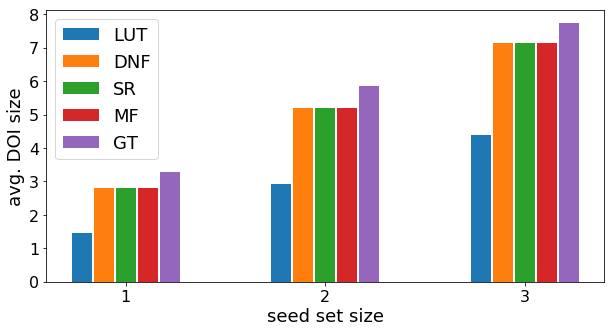

In [22]:
#compare DOIs - plot average DOI sizes
xvalues=[1,2,3]
width=0.1
plt.figure(figsize=(10,5))

plt.bar([x-2*width-.02 for x in xvalues],avg_lut,label='LUT',width=width)
plt.bar([x-width-.01 for x in xvalues],avg_dnf,label='DNF',width=width)
plt.bar([x for x in xvalues],avg_sr,label='SR',width=width)
plt.bar([x+width+.01 for x in xvalues],avg_mf,label='MF',width=width)
plt.bar([x+2*width+.02 for x in xvalues],avg_gt,label='GT',width=width)
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("avg. DOI size",fontsize=18)
plt.legend(fontsize=18)

In [23]:
#find average DOI stats
all_stats={label:{num:{}} for label in labels}

In [26]:
#find stats per seed set size
num=3
num_snodes=2*len(network.nodes) #number of state nodes
labels=['LUT','DNF','SR','MF','GT']
for i,d1 in enumerate([doi_lut,doi_dnf,doi_sr,doi_mf,doi_gt]):
    print("comparing {} with {}".format(labels[i],'ground-truth'))
    dstats={'tps':0.0,'fns':0.0,'fps':0.0,'tns':0.0,'avg_sim':0.0,'accuracy':0.0,'errors':0.0,'recall':0.0,'precision':0.0}
    total=0
    for seed in doi_lut:
        if len(seed)!=num: continue #set to break down by seed set size, comment out to average across seed set sizes
        total+=1
        try: set1=extract_sunits(d1[seed])
        except: set1=d1[seed]
        set2=doi_gt[seed]
        stats=compute_stats_constants(set1,set2,num_snodes)
        for key in stats: dstats[key]+=stats[key]
    dstats={key:dstats[key]/total for key in dstats}
    #print_stats(dstats)
    all_stats[labels[i]][num]=dstats
print(str(total)+" total seed sets")

comparing LUT with ground-truth
comparing DNF with ground-truth
comparing SR with ground-truth
comparing MF with ground-truth
comparing GT with ground-truth
1000 total seed sets


In [27]:
#similarity
simLUT=[all_stats['LUT'][i]['avg_sim'] for i in range(1,4)]
simDNF=[all_stats['DNF'][i]['avg_sim'] for i in range(1,4)]
simSR=[all_stats['SR'][i]['avg_sim'] for i in range(1,4)]
simMF=[all_stats['MF'][i]['avg_sim'] for i in range(1,4)]
#recall
recLUT=[all_stats['LUT'][i]['recall'] for i in range(1,4)]
recDNF=[all_stats['DNF'][i]['recall'] for i in range(1,4)]
recSR=[all_stats['SR'][i]['recall'] for i in range(1,4)]
recMF=[all_stats['MF'][i]['recall'] for i in range(1,4)]
#precision
precLUT=[all_stats['LUT'][i]['precision'] for i in range(1,4)]
precDNF=[all_stats['DNF'][i]['precision'] for i in range(1,4)]
precSR=[all_stats['SR'][i]['precision'] for i in range(1,4)]
precMF=[all_stats['MF'][i]['precision'] for i in range(1,4)]

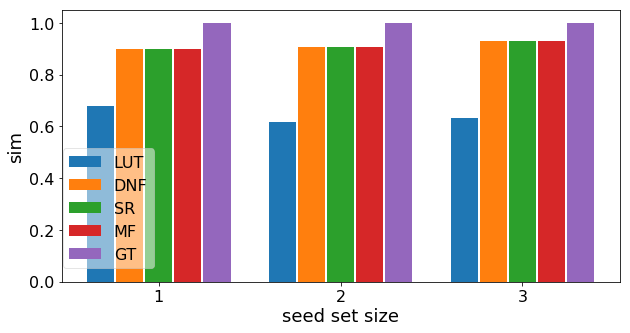

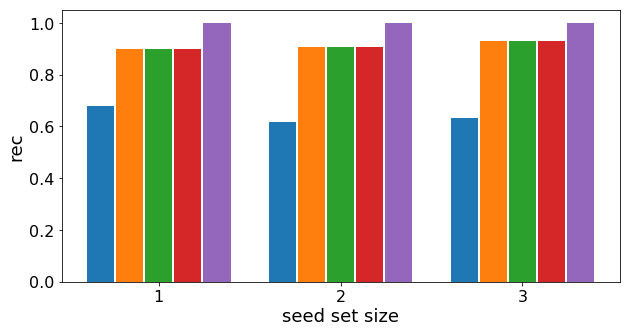

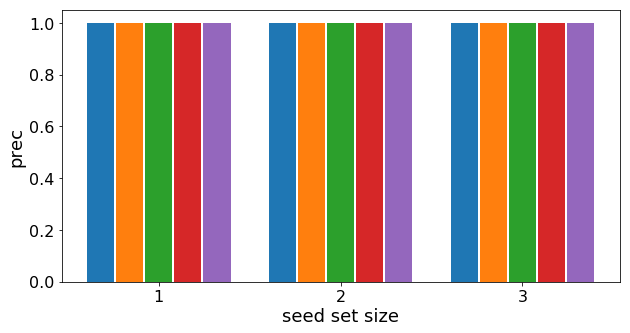

In [28]:
#compare DOIs - plot similarity, recall and precision
xvalues=[1,2,3]
width=0.15

for i,key in enumerate(['sim','rec','prec']):
    plt.figure(figsize=(10,5))
    plt.bar([x-2*width-.02 for x in xvalues],eval(key+'LUT'),label='LUT',width=width)
    plt.bar([x-width-.01 for x in xvalues],eval(key+'DNF'),label='DNF',width=width)
    plt.bar([x for x in xvalues],eval(key+'SR'),label='SR',width=width)
    plt.bar([x+width+.01 for x in xvalues],eval(key+'MF'),label='MF',width=width)
    plt.bar([x+2*width+.02 for x in xvalues],[1,1,1],label='GT',width=width)
    plt.xticks([1,2,3],[1,2,3],fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("seed set size",fontsize=18)
    plt.ylabel(key,fontsize=18)
    if i==0: plt.legend(fontsize=16,framealpha=0.5,bbox_to_anchor=(0.18, 0.52))
    plt.show()